## Set up

In [1]:
import pandas as pd
import time
from langchain.embeddings import HuggingFaceEmbeddings
import importlib
import myutils
import Vector_database_functions as db

## Get the data from jsonl file

In [7]:
documents=myutils.load_docs_from_jsonl('data/harry_Potter_info.jsonl')
print(len(documents))

21996


### Confirming the data is correct

In [8]:
type(documents[0])

langchain_core.documents.base.Document

In [9]:
documents[0].metadata

{'source': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Philosopher%27s_Stone',
 'title': "Harry Potter and the Philosopher's Stone | Harry Potter Wiki | Fandom",
 'description': "Harry Potter and the Philosopher's Stone is the first novel in the Harry Potter series written by J. K. Rowling. The book was first published on 26 June 1997[1] by Bloomsbury in London and was later made into a film of the same name. The book was released in the United States under the name...",
 'language': 'en'}

## Chunking

In [10]:
importlib.reload(myutils)

<module 'myutils' from 'C:\\Users\\linew\\Documents\\SOFT_sem2\\Machine_Learning\\ai_exam\\myutils.py'>

In [11]:
# Split it into chunks
splits = myutils.chunkDocs(documents, 500)
type(splits[0])

langchain_core.documents.base.Document

In [12]:
len(splits)

779309

In [13]:
splits[70]

Document(page_content="him anything about his parents' world, his world. Harry has no idea what's going on. Hagrid tells Harry his parents are famous and that he's a wizard, despite Uncle Vernon forbidding him. Hagrid gives Harry the letter that he has been craving. It tells him that he has been accepted into Hogwarts School of Witchcraft and Wizardry and that term begins on 1st September.", metadata={'source': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Philosopher%27s_Stone', 'title': "Harry Potter and the Philosopher's Stone | Harry Potter Wiki | Fandom", 'description': "Harry Potter and the Philosopher's Stone is the first novel in the Harry Potter series written by J. K. Rowling. The book was first published on 26 June 1997[1] by Bloomsbury in London and was later made into a film of the same name. The book was released in the United States under the name...", 'language': 'en'})

In [14]:
# put splits in dataframe
df = pd.DataFrame(splits, columns=['page_content', 'metadata', 'type'])
df

,page_content,metadata,type
0,"(page_content, Harry Potter and the Philosophe...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
1,"(page_content, Harry Potter and the Order of t...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
2,"(page_content, LEGO Harry Potter: Building the...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
3,"(page_content, Harry Potter and the Goblet of ...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
4,"(page_content, J.K. Rowling: A Year in the Lif...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
...,...,...,...
779304,"(page_content, Myra Curio\n\n\n\n\n\n\n\nLEGO ...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
779305,"(page_content, Harry Potter and the Deathly Ha...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
779306,"(page_content, *Disclosure: Some of the links ...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"
779307,"(page_content, About\t\t\t\t\t\t\t\t\t\t\t\n\n...","(metadata, {'source': 'https://harrypotter.fan...","(type, Document)"


In [15]:
df['page_content'][0]

('page_content',
 "Harry Potter and the Philosopher's Stone | Harry Potter Wiki | Fandom\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHarry Potter Wiki\n\n\n\n\n\n Explore\n\n \n\n\n\n\n Main Page\n\n\n\n\n Discuss\n\n\n\n\nAll Pages\n\n\n\n\nCommunity\n\n\n\n\nInteractive Maps\n\n\n\n\nRecent Blog Posts\n\n\n\n\n\n\n\n\nBooks\n\n \n\n\n\n\nThe Seven Novels\n \n\n\n\n\nHarry Potter and the Philosopher's Stone\n\n\n\n\nHarry Potter and the Chamber of Secrets\n\n\n\n\nHarry Potter and the Prisoner of Azkaban\n\n\n\n\nHarry Potter and the Goblet of Fire")

In [16]:
df['metadata'][0]

('metadata',
 {'source': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Philosopher%27s_Stone',
  'title': "Harry Potter and the Philosopher's Stone | Harry Potter Wiki | Fandom",
  'description': "Harry Potter and the Philosopher's Stone is the first novel in the Harry Potter series written by J. K. Rowling. The book was first published on 26 June 1997[1] by Bloomsbury in London and was later made into a film of the same name. The book was released in the United States under the name...",
  'language': 'en'})

In [17]:
data = pd.concat([df.drop(['metadata'], axis=1), df['metadata'].apply(pd.Series)], axis=1)
data

,page_content,type,0,1
0,"(page_content, Harry Potter and the Philosophe...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
1,"(page_content, Harry Potter and the Order of t...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
2,"(page_content, LEGO Harry Potter: Building the...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
3,"(page_content, Harry Potter and the Goblet of ...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
4,"(page_content, J.K. Rowling: A Year in the Lif...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
...,...,...,...,...
779304,"(page_content, Myra Curio\n\n\n\n\n\n\n\nLEGO ...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
779305,"(page_content, Harry Potter and the Deathly Ha...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
779306,"(page_content, *Disclosure: Some of the links ...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...
779307,"(page_content, About\t\t\t\t\t\t\t\t\t\t\t\n\n...","(type, Document)",metadata,{'source': 'https://harrypotter.fandom.com/wik...


In [ ]:
# Creating a word cloud for visual presentation of data
im, longstring = myutils.wordCloud(df, 'page_content')

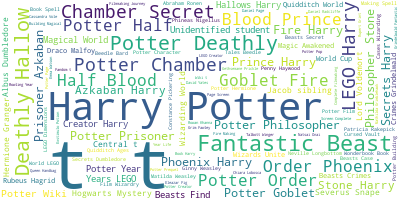

In [19]:
im

## Embeddings

In [20]:
# Defining model to use for embeddings
model_name = "sentence-transformers/all-mpnet-base-v2"
# model_name = "sentence-transformers/all-MiniLM-l6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}

In [21]:
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

## Storing the Embeddings in Vector DB


In [22]:
# Takes around 24 hours +
start = time.time()
print("create the vector store")
# Create the vector store
db.Create(splits, "Harry_Potter", embeddings, "/data/Chroma/")
end = time.time()
print((end - start)/60)

create the vector store


Exception: {"error":"UniqueConstraintError('Collection Harry_Potter already exists')"}

In [ ]:
len(db.get_db( "Harry_Potter", embeddings, "data/Chroma/"))